## News Headlines Sentiment

In [4]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jexib\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [6]:
type(api_key)

str

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key)

In [8]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_news["totalResults"]

4477

In [9]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_news["totalResults"]

1221

In [10]:
bitcoin_titles = [(article["title"]) for article in bitcoin_news["articles"]]
bitcoin_titles

['An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'Is the New Visa Bitcoin Rewards Card Worth It?',
 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'Bitcoin is flirting with $20,000 again. How high will it go this time?',
 'Bitcoin Could Hit $20K Again But This Time No One Cares',
 'As Crypto comes back, Binance-backed Injective Protocol launches Testnet for its DeFi trading platform',
 'Bitcoin soars after BlackRock says it could replace gold',
 'The Morning After: Xbox Series X and Series S reviews are in',
 "'Individual X' stole $1 billion in crypto from Silk Road. U.S. officials just seized it.",
 'Online Shopping, Virus in Winter, Stock Market: Your Monday Evening Briefing',
 'Maisie Williams asks about Bitcoin. Memefest ensues, and Elon Musk joins the party.',
 "The DOJ Seized Over a Billion Dollars From Silk Road's Bitcoin Coffers",
 'Microsoft engineer gets nine years for stealing $10M from Microsoft',
 'Bitcoin price soars above $18,000, the hi

In [11]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_titles = [(article["title"]) for article in bitcoin_news["articles"]]
def get_sentiment(score):
   result = 0 # Neutral by default
   if score >= 0.05: # Positive
        result = 1
   elif score <= -0.05: # Negative
        result= -1
   return result

text_sent ={
    "text_compound": [],
    "text_pos": [],
    "text_neu":[],
    "text_neg":[],
    "text_sent":[],
}

# Get sentiment for the text and the title
for article in bitcoin_news["articles"]:

    try:
        # Sentiment scoring with VADER
        
        text_sentiment = analyzer.polarity_scores(article["content"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(article["content"])
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame

bitcoin_sent_df = pd.DataFrame(text_sent)
bitcoin_sent_df = bitcoin_sent_df.rename(columns={"text_compound":"Compound", "text_pos": "Positive", "text_neu": "Neutral", "text_neg": "Negative", "text_sent":"Text"})

bitcoin_sent_df.head()

,Compound,Positive,Neutral,Negative,Text
0,-0.6705,0.064,0.737,0.199,A former Microsoft software engineer from Ukra...
1,0.6369,0.162,0.838,0.000,Visa has partnered with cryptocurrency startup...
2,0.2144,0.053,0.947,0.000,PayPal is bringing its newly-announced support...
3,0.2023,0.050,0.950,0.000,"In November 2017, after an absolutely massive,..."
4,0.4404,0.152,0.773,0.075,If youve been watching the crypto markets over...


In [12]:
# Create the ethereum sentiment scores DataFrame
def get_sentiment(score):
   result = 0 # Neutral by default
   if score >= 0.05: # Positive
        result = 1
   elif score <= -0.05: # Negative
        result= -1
   return result

text_sent ={
    "text_compound": [],
    "text_pos": [],
    "text_neu":[],
    "text_neg":[],
    "text_sent":[],
}

# Get sentiment for the text and the title
for article in ethereum_news["articles"]:

    try:
        # Sentiment scoring with VADER
        
        text_sentiment = analyzer.polarity_scores(article["content"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(article["content"])
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame

ethereum_sent_df = pd.DataFrame(text_sent)
ethereum_sent_df = ethereum_sent_df.rename(columns={"text_compound":"Compound", "text_pos": "Positive", "text_neu": "Neutral", "text_neg": "Negative", "text_sent":"Text"})

ethereum_sent_df.head()

,Compound,Positive,Neutral,Negative,Text
0,0.2144,0.053,0.947,0.0,PayPal is bringing its newly-announced support...
1,0.0000,0.000,1.000,0.0,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.088,0.912,0.0,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.000,1.000,0.0,FILE PHOTO: Representation of the Ethereum vir...
4,0.8779,0.318,0.682,0.0,"PayPal has launched the Generosity Network, a ..."


In [13]:
# Describe the Bitcoin Sentiment
bitcoin_sent_df.describe()

,Compound,Positive,Neutral,Negative
count,19.000000,19.000000,19.000000,19.000000
mean,0.096205,0.062316,0.903579,0.034053
std,0.395299,0.063634,0.095656,0.067692
min,-0.670500,0.000000,0.716000,0.000000
25%,0.000000,0.000000,0.833500,0.000000
50%,0.000000,0.053000,0.941000,0.000000
75%,0.325950,0.093000,1.000000,0.031000
max,0.765000,0.174000,1.000000,0.215000


In [14]:
# Describe the Ethereum Sentiment
ethereum_sent_df.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.00000,20.000000,20.000000
mean,0.153245,0.06430,0.914650,0.021050
std,0.339247,0.07896,0.104806,0.054473
min,-0.493900,0.00000,0.672000,0.000000
25%,0.000000,0.00000,0.876000,0.000000
50%,0.000000,0.06150,0.932000,0.000000
75%,0.430825,0.09525,1.000000,0.000000
max,0.877900,0.31800,1.000000,0.196000


### Questions:
* Q: Which coin had the highest mean positive score?
* A: Ethereum had the highest mean positive score of 0.075 

* Q: Which coin had the highest compound score?
* A: Ethereum had the highest compound score of 0.95

* Q. Which coin had the highest positive score?
* A: Ethereum had the highest positive score of 0.32

## Tokenizer

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Expand the default stopwords list if necessary


In [17]:
# Complete the tokenizer function
lemmatizer = WordNetLemmatizer()
def tokenizer(text):
    sw = stopwords.words('english')
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [18]:
# Create a new tokens column for bitcoin
bitcoin_sent_df["Token"] = bitcoin_sent_df["Text"].apply(tokenizer)
bitcoin_sent_df.head()

,Compound,Positive,Neutral,Negative,Text,Token
0,-0.6705,0.064,0.737,0.199,A former Microsoft software engineer from Ukra...,former microsoft software engineer ukraine ha ...
1,0.6369,0.162,0.838,0.000,Visa has partnered with cryptocurrency startup...,visahas partnered cryptocurrency startup block...
2,0.2144,0.053,0.947,0.000,PayPal is bringing its newly-announced support...,paypal bringing newlyannounced support cryptoc...
3,0.2023,0.050,0.950,0.000,"In November 2017, after an absolutely massive,...",november absolutely massive twomonth rally bit...
4,0.4404,0.152,0.773,0.075,If youve been watching the crypto markets over...,youve watching crypto market past week youll n...


In [19]:
# Create a new tokens column for ethereum
ethereum_sent_df["Token"] = ethereum_sent_df["Text"].apply(tokenizer)
ethereum_sent_df.head()

,Compound,Positive,Neutral,Negative,Text,Token
0,0.2144,0.053,0.947,0.0,PayPal is bringing its newly-announced support...,paypal bringing newlyannounced support cryptoc...
1,0.0000,0.000,1.000,0.0,FILE PHOTO: Representation of the Ethereum vir...,file photo representation ethereum virtual cur...
2,0.4215,0.088,0.912,0.0,LONDON (Reuters) - Digital currencies Ethereum...,london reuters digital currency ethereum xrp s...
3,0.0000,0.000,1.000,0.0,FILE PHOTO: Representation of the Ethereum vir...,file photo representation ethereum virtual cur...
4,0.8779,0.318,0.682,0.0,"PayPal has launched the Generosity Network, a ...",paypal ha launched generosity network platform...


## NGrams and Frequency Analysis

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
bitcoin_grams = Counter(ngrams(bitcoin_sent_df["Text"].str.cat().split(), n=2))
bitcoin_grams.most_common(20)

[(('of', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'Bitcoin'), 4),
 (('in', 'this'), 4),
 (('illustration', 'taken'), 4),
 (('2020.', 'REUTERS/Dado'), 4),
 (('has', 'been'), 3),
 (('more', 'than'), 3),
 (('PHOTO:', 'Representations'), 3),
 (('Representations', 'of'), 3),
 (('Bitcoin', 'are'), 3),
 (('chars]By', 'Reuters'), 3),
 (('Reuters', 'Staff'), 3),
 (('Staff', 'FILE'), 3),
 (('FILE', 'PHOTO:'), 3),
 (('this', 'illustration'), 3),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 3),
 (('A', 'former'), 2),
 (('former', 'Microsoft'), 2),
 (('Microsoft', 'software'), 2)]

In [22]:
# Generate the Ethereum N-grams where N=2
ethereum_grams = Counter(ngrams(ethereum_sent_df["Text"].str.cat().split(), n=2))
ethereum_grams.most_common(20)

[(('virtual', 'currency'), 8),
 (('in', 'this'), 8),
 (('this', 'illustration'), 8),
 (('is', 'seen'), 7),
 (('seen', 'in'), 7),
 (('(Reuters)', '-'), 6),
 (('chars]By', 'Reuters'), 6),
 (('Reuters', 'Staff'), 6),
 (('of', 'virtual'), 6),
 (('currency', 'Bitcoin'), 6),
 (('illustration', 'taken'), 6),
 (('2020.', 'REUTERS/Dado'), 6),
 (('of', 'the'), 5),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 5),
 (('FILE', 'PHOTO:'), 5),
 (('A', 'representation'), 5),
 (('representation', 'of'), 5),
 (('Bitcoin', 'is'), 5),
 (('taken', 'November'), 5),
 (('November', '19,'), 5)]

In [23]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    #tokens = tokenizer(tokens)
    top_10 = dict(Counter(tokens).most_common(10))
    #return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])
    return Counter(tokens).most_common(10)

In [24]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_sent_df["Text"].str.cat().split(), 10)


[('to', 16),
 ('the', 15),
 ('in', 14),
 ('of', 13),
 ('a', 10),
 ('Bitcoin', 9),
 ('has', 7),
 ('with', 7),
 ('this', 7),
 ('been', 6)]

In [25]:
# Get the top 10 words for Ethereum
token_count(ethereum_sent_df["Text"].str.cat().split(), 10)

[('of', 21),
 ('in', 17),
 ('a', 16),
 ('is', 15),
 ('the', 15),
 ('to', 14),
 ('Bitcoin', 11),
 ('this', 10),
 ('and', 10),
 ('virtual', 9)]

## Word Clouds

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, ' Bitcoin word cloud')

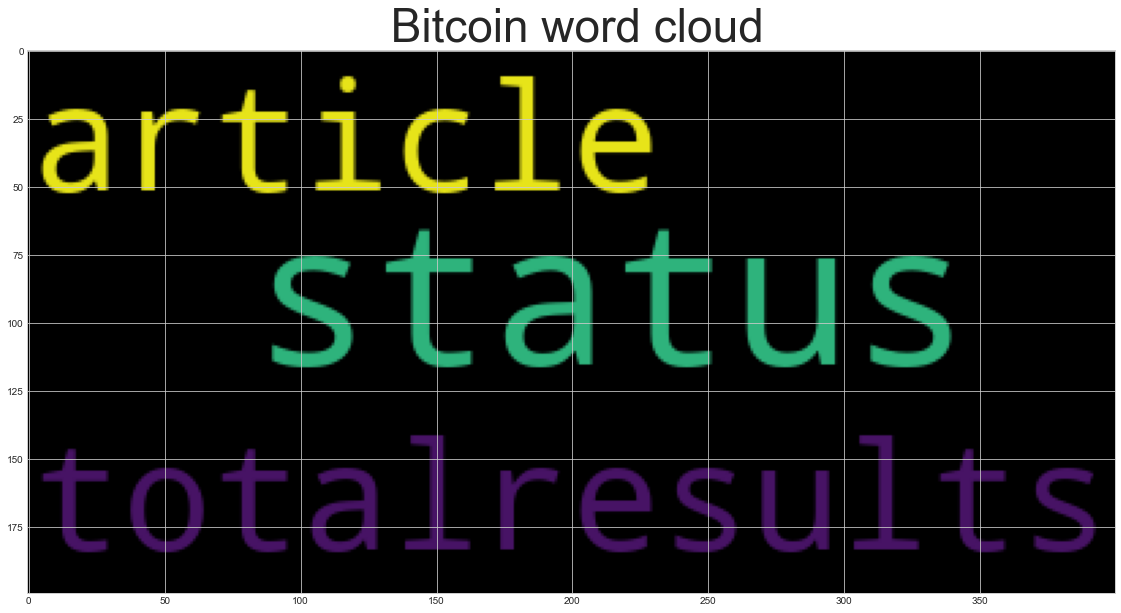

In [46]:
# Generate the Bitcoin word cloud
big_string = ' '. join(bitcoin_news)
input_text = tokenizer(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)
plt.title(" Bitcoin word cloud", fontdict={'fontsize': 46})

Text(0.5, 1.0, 'Ethereum word cloud')

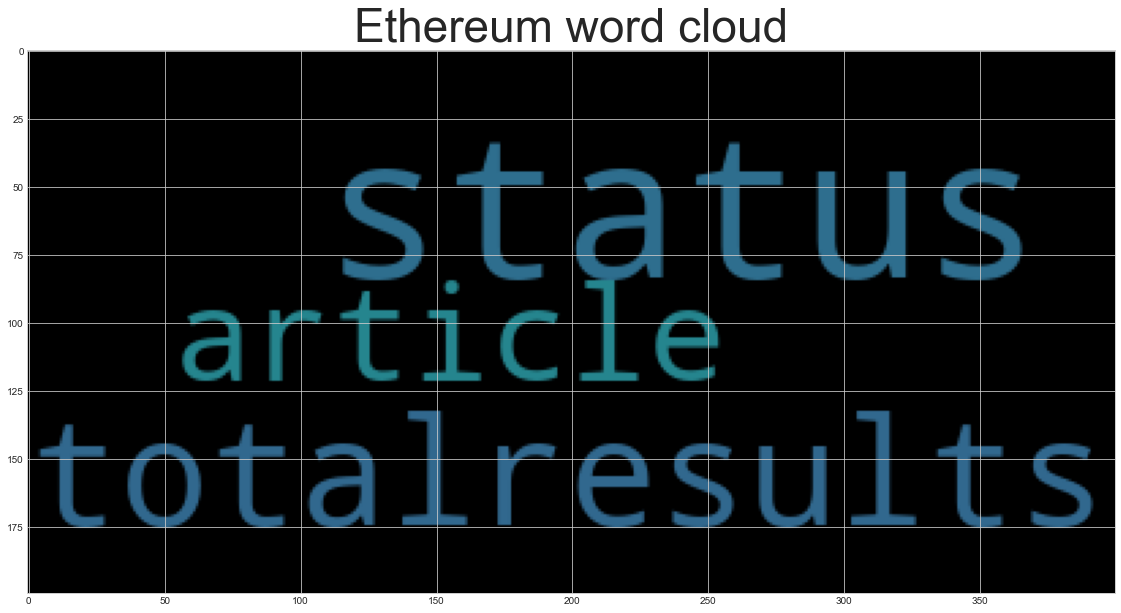

In [45]:
# Generate the Ethereum word cloud
big_string_et = ' '. join(ethereum_news)
input_text_et = tokenizer(big_string_et)
wc_et = WordCloud().generate(input_text_et)
plt.imshow(wc_et)
plt.title("Ethereum word cloud", fontdict={'fontsize': 46})

## Named Entity Recognition

In [29]:
import spacy
from spacy import displacy

In [30]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [32]:
# Concatenate all of the bitcoin text together


In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [34]:
# Render the visualization

In [35]:
# List all Entities

##  Ethereum NER

In [36]:
# Concatenate all of the ethereum text together

In [37]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [38]:
# Render the visualization

In [39]:
# List all Entities